<a href="https://colab.research.google.com/github/oriPeisah-123IE/NBA-3-Point-Revolution/blob/main/NBA_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/NBA Project.xlsx')
print(df.shape)
df.head()

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
# Keeping the important columns.
columns_to_keep = ['Year', 'Player', 'Pos', 'G', 'MP', 'FGA', '3PA', '3P', 'PTS']
df = df[columns_to_keep].copy()

# types of data
print(df.dtypes)

Year      float64
Player     object
Pos        object
G         float64
MP        float64
FGA       float64
3PA       float64
3P        float64
PTS       float64
dtype: object


In [ ]:
print(df.isnull().sum())
#how much is null?
df = df.dropna(subset=['3PA'])
#fill the empthy cells with 0
df = df.fillna(0)

print("\nMissing values after cleaning:", df.isnull().sum().sum())

Year        67
Player      67
Pos         67
G           67
MP         553
FGA         67
3PA       5764
3P        5764
PTS         67
dtype: int64

Missing values after cleaning: 0


In [ ]:
# Cleaning the Data. Players who Played more then 10 games and more then 100 minutes
df = df[(df['G'] >= 10) & (df['MP'] >= 100)]
# make sure the showen data is between 1997-2017
df = df[df['Year'] >= 1997]
df.head()

,Year,Player,Pos,G,MP,FGA,3PA,3P,PTS
12839,1997.0,Mahmoud Abdul-Rauf,PG,75.0,2131.0,924.0,246.0,94.0,1031.0
12840,1997.0,Shareef Abdur-Rahim,PF,80.0,2802.0,1214.0,27.0,7.0,1494.0
12841,1997.0,Rafael Addison,SF,41.0,355.0,122.0,20.0,8.0,128.0
12842,1997.0,Cory Alexander,PG,80.0,1454.0,490.0,252.0,94.0,577.0
12843,1997.0,Jerome Allen,SG,76.0,943.0,221.0,93.0,30.0,228.0


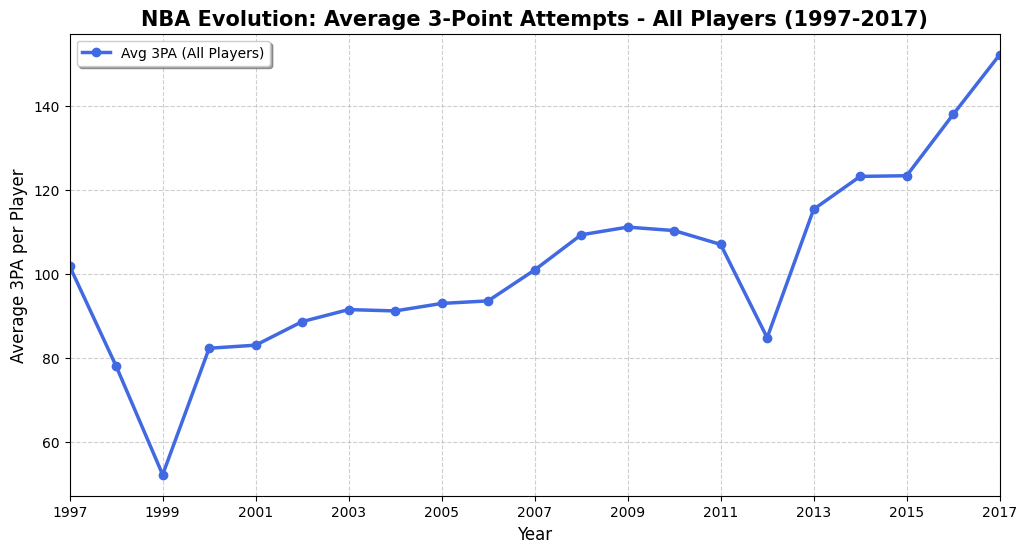

<Figure size 640x480 with 0 Axes>

In [ ]:


# Initial Cleaning for 1997-2017 and Trade Duplicates
df_all = df[(df['Year'] >= 1997) & (df['Year'] <= 2017)].copy()
df_all = df_all.drop_duplicates(subset=['Player', 'Year'], keep='first')

# Calculate the mean for all players
yearly_vol_all = df_all.groupby('Year')['3PA'].mean()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(yearly_vol_all.index, yearly_vol_all.values, marker='o', color='royalblue', linewidth=2.5, label='Avg 3PA (All Players)')

plt.title('NBA Evolution: Average 3-Point Attempts - All Players (1997-2017)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average 3PA per Player', fontsize=12)
plt.xlim(1997, 2017)
plt.xticks(range(1997, 2018, 2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', shadow=True)
plt.show()
plt.savefig('nba_revolution_plot.png', dpi=300)


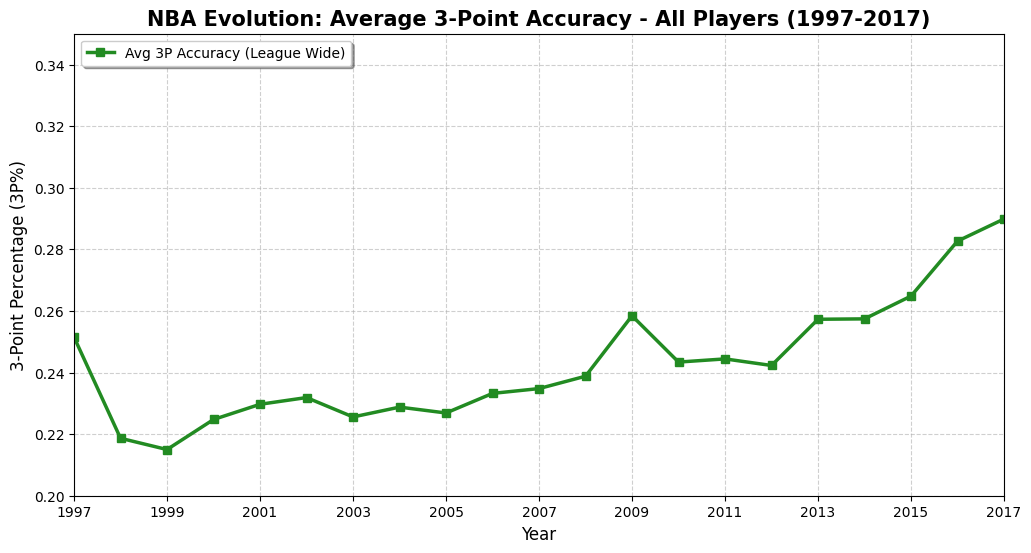

<Figure size 640x480 with 0 Axes>

In [ ]:
# 1. Filter for the years 1997-2017 and remove trade duplicates
df_acc = df[(df['Year'] >= 1997) & (df['Year'] <= 2017)].copy()
df_acc = df_acc.drop_duplicates(subset=['Player', 'Year'], keep='first')

# 2. Calculate Shooting Percentage for ALL players
# We use fillna(0) because players with 0 attempts would result in 'NaN'
df_acc['3P_Pct'] = df_acc['3P'] / df_acc['3PA']
df_acc['3P_Pct'] = df_acc['3P_Pct'].fillna(0)

# 3. Calculate the mean accuracy for the whole league
yearly_accuracy = df_acc.groupby('Year')['3P_Pct'].mean()

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.plot(yearly_accuracy.index, yearly_accuracy.values,
         marker='s', color='forestgreen', linewidth=2.5, label='Avg 3P Accuracy (League Wide)')

# 5. Styling in English
plt.title('NBA Evolution: Average 3-Point Accuracy - All Players (1997-2017)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('3-Point Percentage (3P%)', fontsize=12)

# Legend and Axis formatting
plt.legend(loc='upper left', shadow=True)
plt.xlim(1997, 2017)
plt.xticks(range(1997, 2018, 2))

# Important: We adjust the Y-limit to show the lower accuracy of the entire league
plt.ylim(0.20, 0.35)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
plt.savefig('nba_revolution_plot.png', dpi=300)

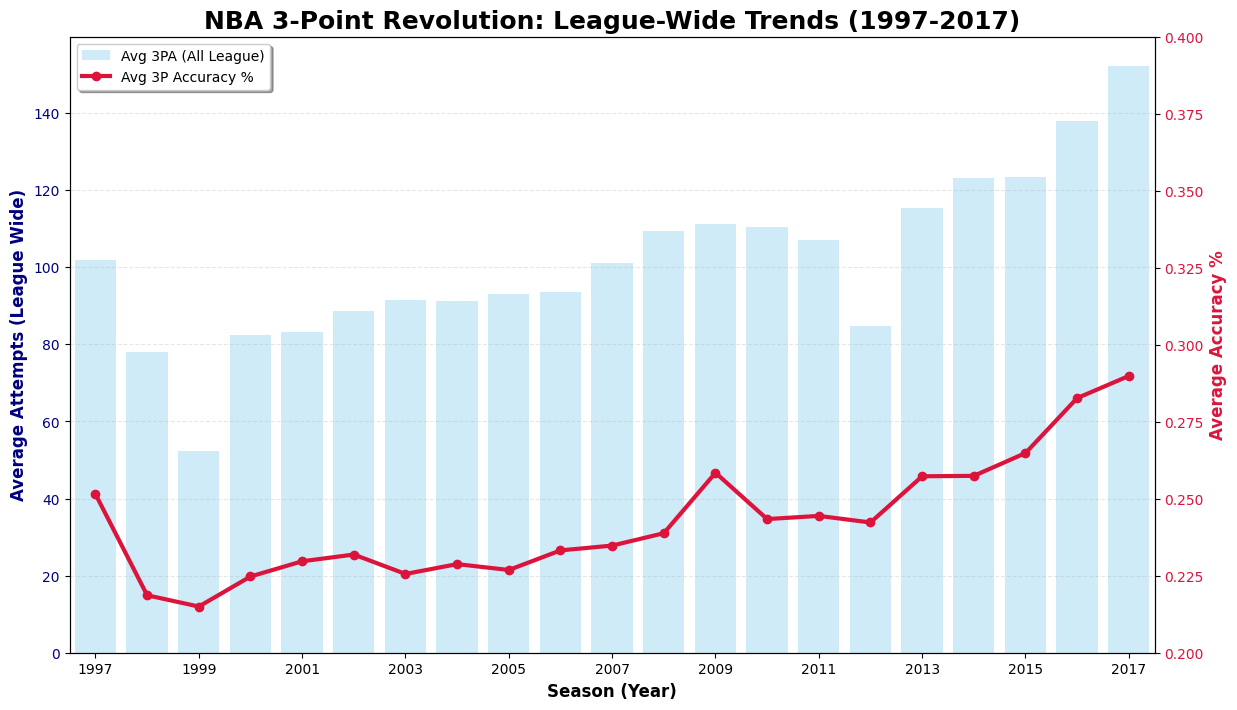

<Figure size 640x480 with 0 Axes>

In [ ]:


# 1. Prepare Data - 1997-2017, Clean Trades
df_final = df[(df['Year'] >= 1997) & (df['Year'] <= 2017)].copy()
df_final = df_final.drop_duplicates(subset=['Player', 'Year'], keep='first')

# 2. Calculate Pct for ALL players (handling division by zero)
df_final['3P_Pct'] = df_final['3P'] / df_final['3PA']
df_final['3P_Pct'] = df_final['3P_Pct'].fillna(0) # Fill 0 for players with no attempts

# 3. Aggregate - MEAN for ALL players
# This will match your first graph where 2017 is around 140
combined_all = df_final.groupby('Year').agg({
    '3PA': 'mean',
    '3P_Pct': 'mean'
})

# 4. Create Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Primary Axis: Volume (Bars) - Now showing the 140 avg
ax1.bar(combined_all.index, combined_all['3PA'], color='skyblue', alpha=0.4, label='Avg 3PA (All League)')
ax1.set_xlabel('Season (Year)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Attempts (League Wide)', color='navy', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='navy')

# Secondary Axis: Accuracy (Line)
ax2 = ax1.twinx()
ax2.plot(combined_all.index, combined_all['3P_Pct'], color='crimson', marker='o', linewidth=3, label='Avg 3P Accuracy %')
ax2.set_ylabel('Average Accuracy %', color='crimson', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='crimson')

# Set specific limits to make the graph clear
ax2.set_ylim(0.20, 0.40) # Accuracy for the WHOLE league is lower (around 25-30%)
plt.xlim(1996.5, 2017.5)
plt.xticks(range(1997, 2018, 2))

plt.title('NBA 3-Point Revolution: League-Wide Trends (1997-2017)', fontsize=18, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', shadow=True)

plt.show()
plt.savefig('nba_revolution_plot.png', dpi=300)

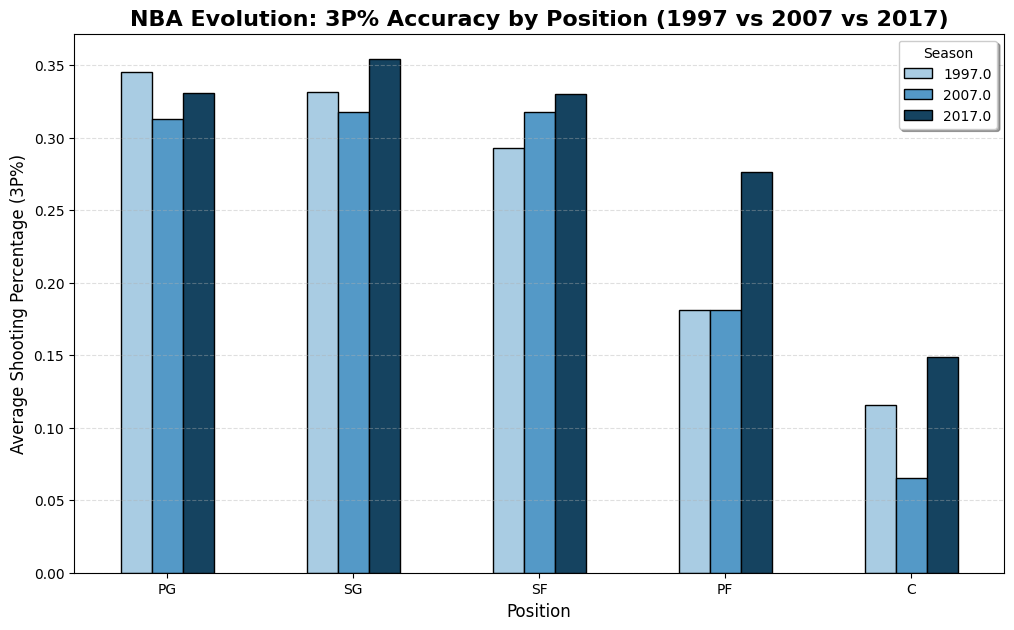

<Figure size 640x480 with 0 Axes>

In [ ]:

# 1. Re-defining the clean data for positions
df_pos_acc = df[(df['Year'] >= 1997) & (df['Year'] <= 2017)].copy()
df_pos_acc = df_pos_acc.drop_duplicates(subset=['Player', 'Year'], keep='first')

# 2. Clean positions (
df_pos_acc['Pos_Clean'] = df_pos_acc['Pos'].str.split('-').str[0]

# 3. Calculate 3P% and handle missing values
df_pos_acc['3P_Pct'] = df_pos_acc['3P'] / df_pos_acc['3PA']
df_pos_acc['3P_Pct'] = df_pos_acc['3P_Pct'].fillna(0)

# 4. Filter specifically for 1997, 2007, and 2017 to show the evolution
years_to_show = [1997, 2007, 2017]
df_comparison = df_pos_acc[df_pos_acc['Year'].isin(years_to_show)]

# 5. Create the Pivot Table for the Bar Chart
# Rows: Positions, Columns: Selected Years
pos_bar_data = df_comparison.pivot_table(index='Pos_Clean', columns='Year', values='3P_Pct', aggfunc='mean')

# Reorder to traditional NBA positions
traditional_order = ['PG', 'SG', 'SF', 'PF', 'C']
pos_bar_data = pos_bar_data.reindex(traditional_order)

# 6. Visualization - Grouped Bar Chart
pos_bar_data.plot(kind='bar', figsize=(12, 7), color=['#A9CCE3', '#5499C7', '#154360'], edgecolor='black')

# Styling
plt.title('NBA Evolution: 3P% Accuracy by Position (1997 vs 2007 vs 2017)', fontsize=16, fontweight='bold')
plt.ylabel('Average Shooting Percentage (3P%)', fontsize=12)
plt.xlabel('Position', fontsize=12)
plt.xticks(rotation=0) # Keeps position names horizontal
plt.legend(title='Season', shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()
plt.savefig('nba_revolution_plot.png', dpi=300)

In [ ]:
# 1. Filter data for the last 20 years and remove duplicates
df_players = df[(df['Year'] >= 1997) & (df['Year'] <= 2017)].copy()
df_players = df_players.drop_duplicates(subset=['Player', 'Year'], keep='first')

# 2. Group by Player to sum their total 3P and 3PA over the entire period
career_stats = df_players.groupby('Player').agg({
    '3P': 'sum',
    '3PA': 'sum'
})

# 3. Calculate career 3P% for this period
career_stats['3P_Pct'] = career_stats['3P'] / career_stats['3PA']

  # 4. Set a minimum threshold to ensure they are consistent shooters
  # (e.g., at least 500 attempts over 20 years)
min_attempts = 500
top_shooters = career_stats[career_stats['3PA'] >= min_attempts].copy()

  # 5. Sort by percentage and take the top 10
top_10_shooters = top_shooters.sort_values(by='3P_Pct', ascending=False).head(10)

# Display the results
print(f"Top 10 3-Point Shooters (1997-2017) with at least {min_attempts} attempts:")
print(top_10_shooters[['3PA', '3P_Pct']])

Top 10 3-Point Shooters (1997-2017) with at least 500 attempts:
                  3PA    3P_Pct
Player                         
Stephen Curry  4379.0  0.437771
Hubert Davis    944.0  0.435381
Jason Kapono   1054.0  0.433586
Kyle Korver    4754.0  0.431005
Steve Novak    1316.0  0.430851
Chris Mullin*   764.0  0.428010
Steve Nash     3939.0  0.427774
Steve Kerr      745.0  0.424161
Wesley Person  2175.0  0.421609
Jeff Hornacek   541.0  0.421442


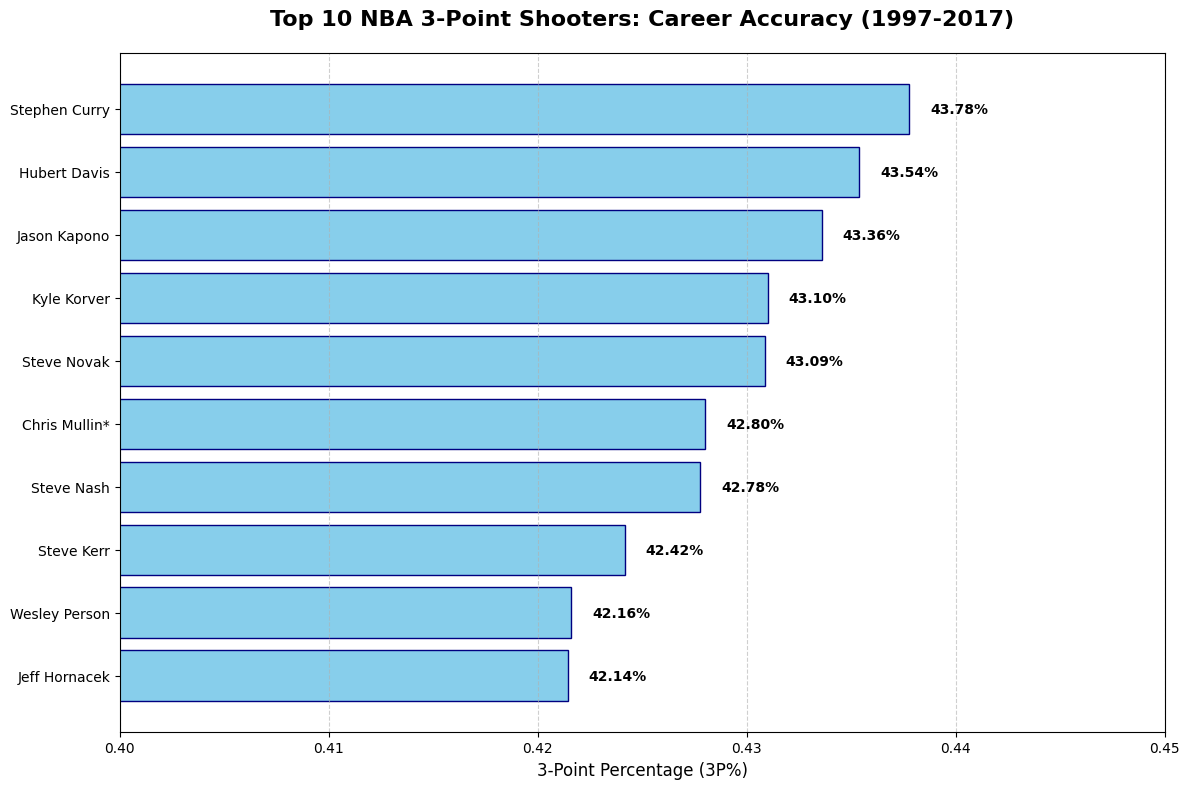

<Figure size 640x480 with 0 Axes>

In [ ]:

# 1. Preparation: Sort the data
top_10_plot = top_10_shooters.sort_values(by='3P_Pct', ascending=True) # Ascending for horizontal bar

# 2. Visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_plot.index, top_10_plot['3P_Pct'], color='skyblue', edgecolor='navy')

# 3. Styling
plt.title('Top 10 NBA 3-Point Shooters: Career Accuracy (1997-2017)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('3-Point Percentage (3P%)', fontsize=12)
plt.xlim(0.40, 0.45) # Zoom in to see the small differences between legends
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 4. Adding labels to the bars (The exact percentage)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.2%}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
plt.savefig('nba_revolution_plot.png', dpi=300)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# All the shooters with atleast 500 shots
x = top_shooters[['3PA', '3P_Pct']]

# Scaling The Data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("Data is scaled and ready for clustering!")

Data is scaled and ready for clustering!


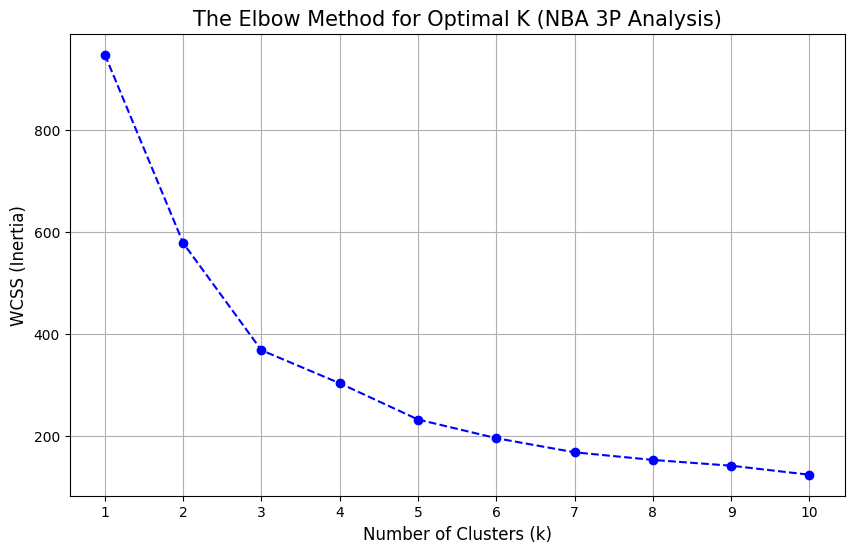

In [ ]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS)
wcss = []

# Loop through 1 to 10 potential clusters to find the optimal 'k'
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters (i)
    # k-means++ ensures a smarter initialization of centroids
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # Fit the model to our scaled features (3PA and 3P_Pct)
    kmeans.fit(x_scaled)

    # Inertia calculates the sum of squared distances of samples to their closest cluster center
    wcss.append(kmeans.inertia_)

# Visualization of the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')

# Adding descriptive titles and labels for the analysis
plt.title('The Elbow Method for Optimal K (NBA 3P Analysis)', fontsize=15)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)

# Set x-axis ticks to show every cluster number clearly
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Top 15 High-Volume Legends found in 'Elite Superstars'
                     3PA    3P_Pct
Player                            
Ray Allen         7429.0  0.400188
Jason Terry       5895.0  0.380322
Jamal Crawford    5861.0  0.349599
Paul Pierce       5816.0  0.368466
Kobe Bryant       5530.0  0.329837
Vince Carter      5485.0  0.373564
Joe Johnson       5186.0  0.373698
Jason Kidd        5048.0  0.353605
Kyle Korver       4754.0  0.431005
J.R. Smith        4747.0  0.373710
Chauncey Billups  4725.0  0.387302
Dirk Nowitzki     4668.0  0.381320
Rashard Lewis     4625.0  0.386378
Peja Stojakovic   4392.0  0.400729
Stephen Curry     4379.0  0.437771


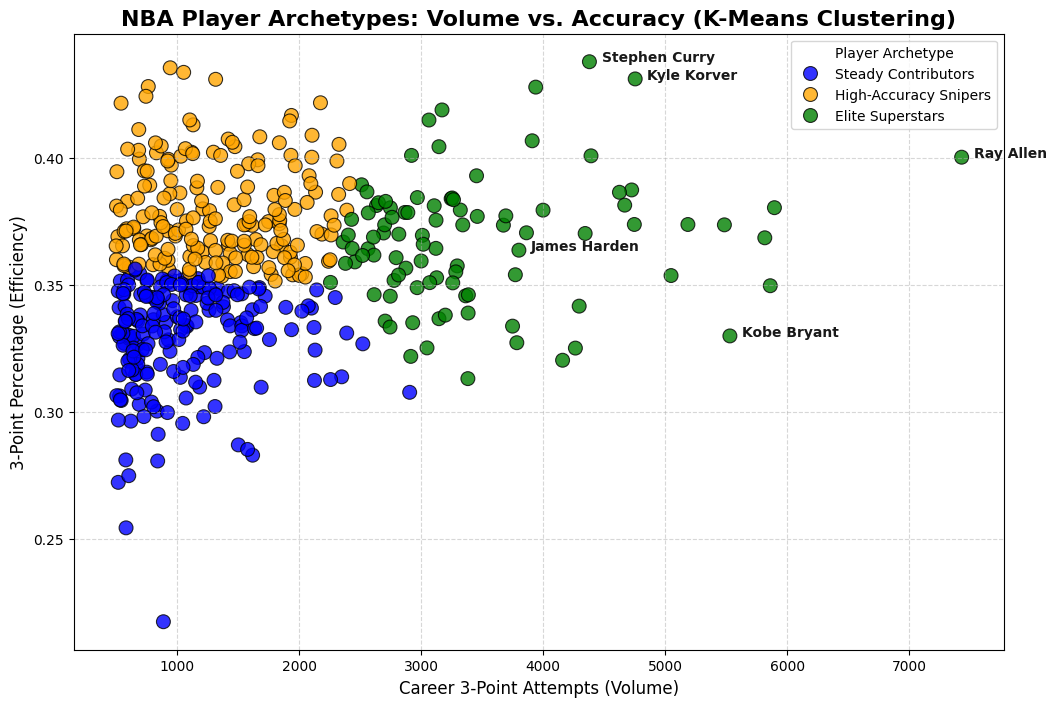

In [ ]:


# 1. Running the final KMeans with k=3 (Using the scaled data from Step 1)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
top_shooters['Cluster'] = kmeans.fit_predict(x_scaled)

# 2. Mapping cluster numbers to names based on your specific visual results:

cluster_labels = {
    2: 'Elite Superstars',      # High Volume & Solid Accuracy
    1: 'Steady Contributors',    # Lower accuracy or developmental volume
    0: 'High-Accuracy Snipers', # High Accuracy but Lower Volume

}
top_shooters['Archetype'] = top_shooters['Cluster'].map(cluster_labels)

# 3. Visualization: Creating the final clear scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_shooters, x='3PA', y='3P_Pct', hue='Archetype',
                palette={'Elite Superstars': 'green',
                         'High-Accuracy Snipers': 'orange',
                         'Steady Contributors': 'blue'},
                s=100, alpha=0.8, edgecolor='black')

# Adding visual guides and labels
plt.title('NBA Player Archetypes: Volume vs. Accuracy (K-Means Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Career 3-Point Attempts (Volume)', fontsize=12)
plt.ylabel('3-Point Percentage (Efficiency)', fontsize=12)
plt.legend(title='Player Archetype', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)



# List of legends to highlight on the graph
legends_to_label = ['Stephen Curry', 'Ray Allen', 'James Harden', 'Kyle Korver','Kobe Bryant']

# Loop through the dataframe and add text labels for these specific players
for i, row in top_shooters.iterrows():
    if i in legends_to_label:
        plt.text(row['3PA'] + 100, row['3P_Pct'], i,
                 fontsize=10, fontweight='bold', color='black', alpha=0.9)


# 4. Verification: Print the top legends in the 'Elite' category to confirm
print( "Top 15 High-Volume Legends found in 'Elite Superstars'")
# Sorting by 3PA to find the most famous high-volume shooters
elite_players = top_shooters[top_shooters['Archetype'] == 'Elite Superstars']
print(elite_players.sort_values(by='3PA', ascending=False).head(15)[['3PA', '3P_Pct']])

In [ ]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 7.0 MB/s eta 0:00:00


/tmp/ipython-input-1934502111.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


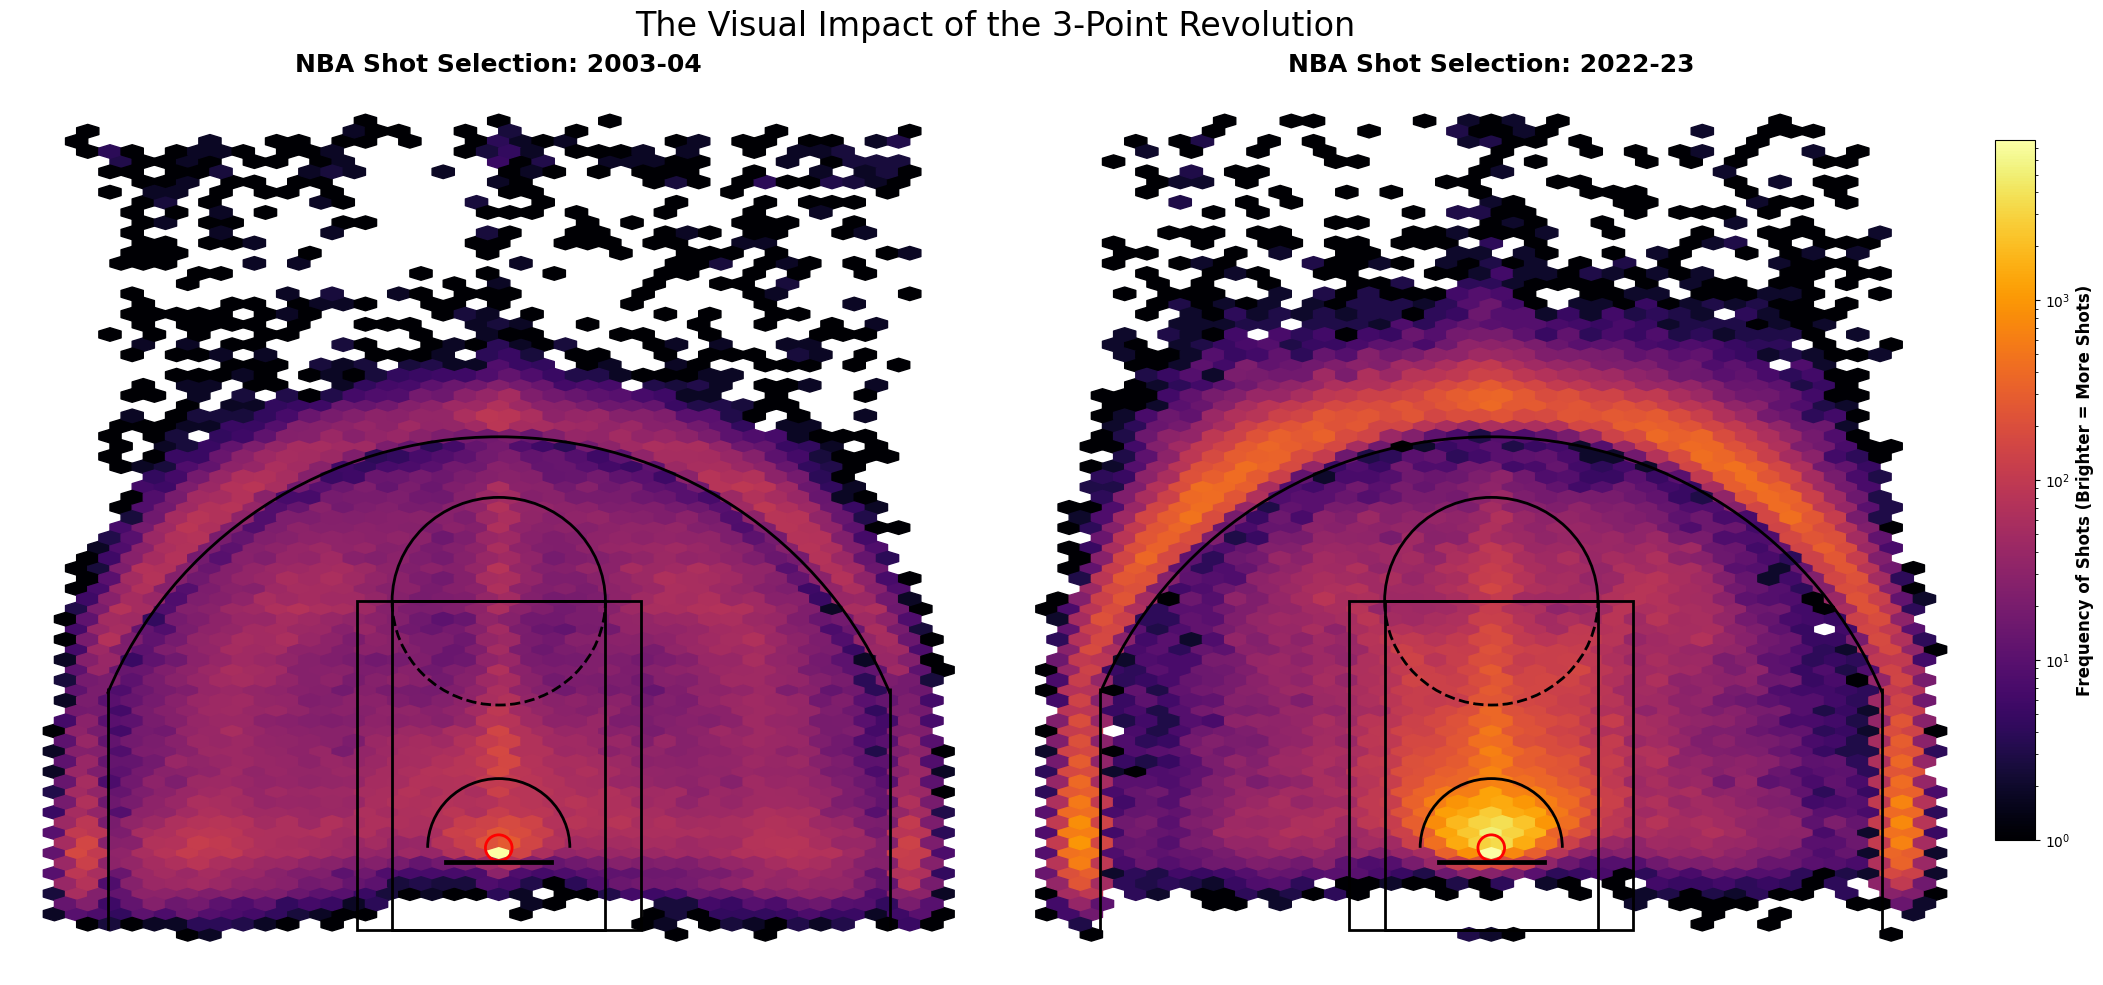

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
import time


def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color="red", fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    for element in court_elements:
        ax.add_patch(element)
    return ax

def get_season_shot_data(season_year):
    shot_data = shotchartdetail.ShotChartDetail(
        team_id=0, player_id=0, context_measure_simple='FGA',
        season_nullable=season_year, season_type_all_star='Regular Season'
    )
    return shot_data.get_data_frames()[0]

# Downloading Data
shots_2003 = get_season_shot_data('2003-04')
time.sleep(1)
shots_2022 = get_season_shot_data('2022-23')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# הגדרות משותפות ל-Hexbin
grid = (40, 40)
ext = (-250, 250, -50, 420)

# עונת 2003-04
hb1 = ax1.hexbin(shots_2003['LOC_X'], shots_2003['LOC_Y'], gridsize=grid, extent=ext, cmap='inferno', bins='log')
draw_court(ax1)
ax1.set_title('NBA Shot Selection: 2003-04', fontsize=18, fontweight='bold')
ax1.set_axis_off()

# עונת 2022-23
hb2 = ax2.hexbin(shots_2022['LOC_X'], shots_2022['LOC_Y'], gridsize=grid, extent=ext, cmap='inferno', bins='log')
draw_court(ax2)
ax2.set_title('NBA Shot Selection: 2022-23', fontsize=18, fontweight='bold')
ax2.set_axis_off()

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb2, cax=cbar_ax)

cbar.set_label('Frequency of Shots (Brighter = More Shots)', fontsize=12, fontweight='bold')

plt.suptitle('The Visual Impact of the 3-Point Revolution', fontsize=24, y=0.98)
plt.tight_layout()
plt.show()